<a href="https://colab.research.google.com/github/dhruvsuri8106-code/ECON-3916---Statistical-and-Machine-Learning/blob/main/Assignment%201/ECON_3916_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
student_basket = [
    {'item': 'tuition', 'price_2016': 50000, 'price_2026': 62000},
    {'item': 'textbooks', 'price_2016': 100, 'price_2026': 225},
    {'item': 'wollastons', 'price_2016': 200,'price_2026': 300},
    {'item': 'streaming', 'price_2016': 85, 'price_2026': 140}]


In [26]:
def calculate_inflation(base, current):
    return(((current-base)/base) *100)

In [27]:
for item in student_basket:
  inflation_rate = calculate_inflation(item['price_2016'], item['price_2026'])
  print(f"{item['item']}: {inflation_rate:.2f}% Inflation")


tuition: 24.00% Inflation
textbooks: 125.00% Inflation
wollastons: 50.00% Inflation
streaming: 64.71% Inflation


In [28]:
!pip install fredapi
from fredapi import Fred

In [29]:
fred = Fred(api_key='0018442f5d7ec600ee4f656cf5577e9b')

In [102]:
official_cpi = fred.get_series('CPIAUCSL')
tuition_inflation = fred.get_series('CUSR0000SEEB')
food_inflation = fred.get_series('CUSR0000SEFV')
streaming_inflation = fred.get_series('CUSR0000SERA02')
rent_inflation = fred.get_series('CUSR0000SEHA')

In [130]:
df = pd.DataFrame({
    'official_cpi': official_cpi,
    'tuition_inflation': tuition_inflation,
    'food_inflation': food_inflation,
    'streaming_inflation': streaming_inflation,
    'rent_inflation': rent_inflation
})


In [131]:
df = df.dropna()

In [140]:
df_norm = df / df.iloc[0] * 100

In [141]:
df_norm

,official_cpi,tuition_inflation,food_inflation,streaming_inflation,rent_inflation,Student_SPI
Year,,,,,,
1992-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1992-02-01,100.216920,100.597907,100.143062,100.553097,100.206327,100.417795
1992-03-01,100.578453,101.395117,100.214592,101.382743,100.756534,101.035660
1992-04-01,100.795372,102.142501,100.286123,102.986726,100.550206,101.518183
1992-05-01,101.012292,102.790234,100.429185,102.433628,100.756534,101.841827
...,...,...,...,...,...,...
2025-07-01,232.922632,445.225710,274.540773,328.807522,299.966988,367.472520
2025-08-01,233.813449,446.091181,275.328326,327.767699,300.867950,368.131576
2025-09-01,234.539407,447.086198,275.716023,328.500000,301.459422,368.895139


In [135]:
print(value_index)

official_cpi           235.741142
tuition_inflation      450.125561
food_inflation         278.890558
streaming_inflation    335.080199
rent_inflation         302.636864
dtype: float64


In [142]:
df_norm.index.name = 'Year'

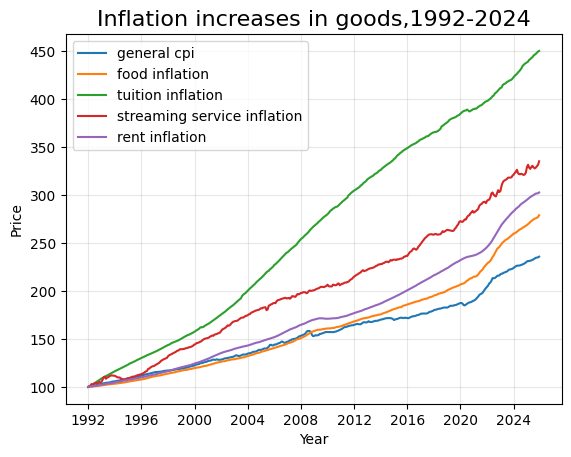

In [143]:
plt.plot(df_norm.index, df_norm['official_cpi'], label = 'general cpi')
plt.plot(df_norm.index, df_norm['food_inflation'], label = 'food inflation')
plt.plot(df_norm.index, df_norm['tuition_inflation'], label = 'tuition inflation')
plt.plot(df_norm.index, df_norm['streaming_inflation'], label = 'streaming service inflation')
plt.plot(df_norm.index, df_norm['rent_inflation'], label = 'rent inflation')
plt.title('Inflation increases in goods,1992-2024', fontsize=16)
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [138]:
weights = {
    "Tuition": 0.40,
    "Rent": 0.30,
    "Food": 0.2,
    "Streaming": 0.10,

}

In [144]:
df_norm["Student_SPI"] = (
    weights['Tuition'] * df["tuition_inflation"] +
    weights['Rent']* df['rent_inflation'] +
    weights['Food']* df['food_inflation'] +
    weights['Streaming']* df["streaming_inflation"])

In [166]:
df_norm = df_norm / df.iloc[0] * 100

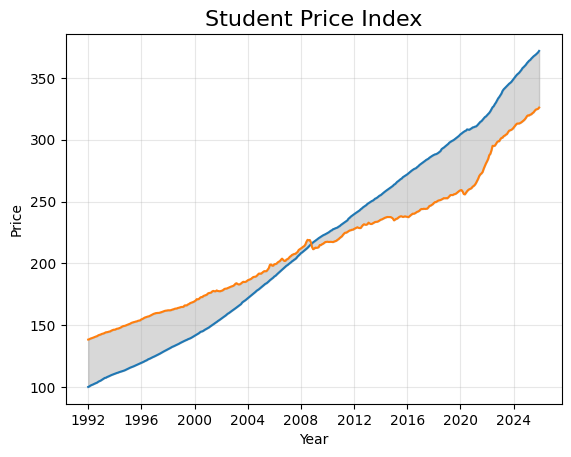

In [167]:
plt.plot(df_norm.index, df_norm['Student_SPI'], label = 'student price index')
plt.plot(df.index, df['official_cpi'], label = 'official CPI')
plt.fill_between(df_norm.index, df_norm['Student_SPI'], df['official_cpi'],color='gray', alpha=0.3)
plt.title('Student Price Index', fontsize=16)
plt.ylabel('Price')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.show()

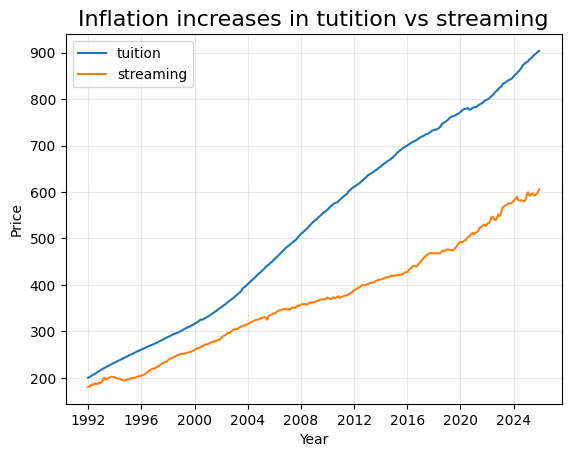

In [168]:
plt.plot(df.index, df['tuition_inflation'], label = 'tuition')
plt.plot(df.index, df['streaming_inflation'], label = 'streaming')
plt.title('Inflation increases in tutition vs streaming', fontsize=16)
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

It is a "data crime" to compare data with different base years because the value of the dollar differs from year to year, so the difference is not actually an accurate description of the gap in values. For example, if something was worth 50 dollars in 1990, you can not equate it to something worth 50 dollars now, because 50 dollars in 1990 was significantly more valuable than in 2026, making the comparison misleading and unrepresentative of value relative to time.

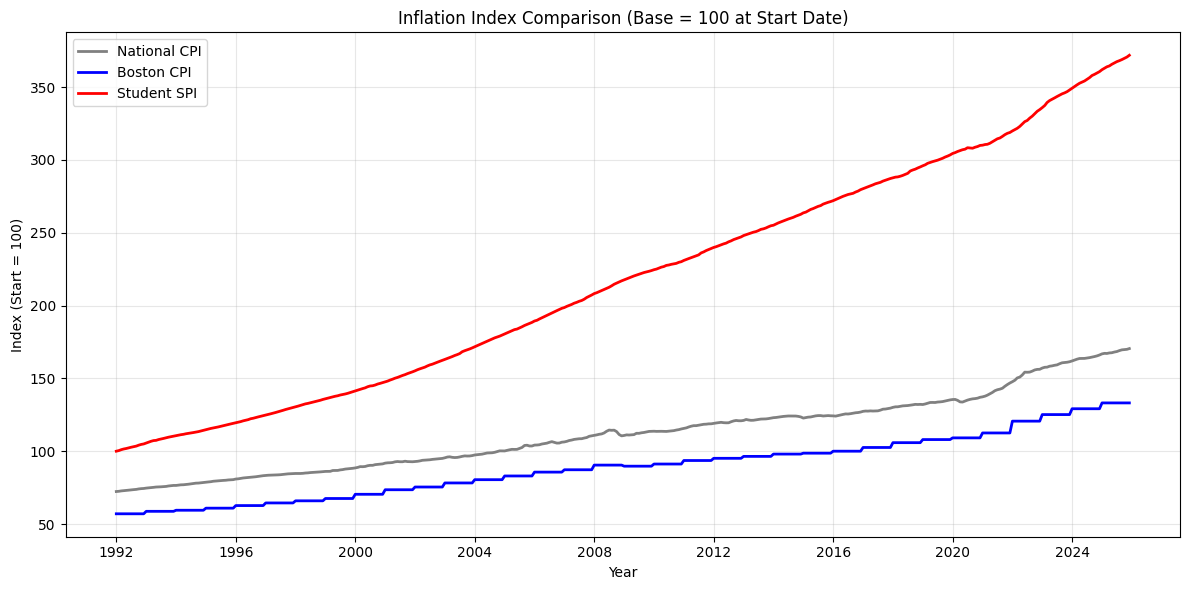

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# --- assumes you already have df_norm with columns:
# df_norm["Official_CPI"] and df_norm["Student_SPI"] (both indexed to 100)
# and df_norm.index is a DatetimeIndex (annual or monthly)

fred = Fred(api_key="0018442f5d7ec600ee4f656cf5577e9b")

BOSTON_SERIES_ID = "CUURA103SA0"  # Boston-Cambridge-Newton CPI-U (All Items)

# 1) Fetch Boston CPI from FRED
boston = fred.get_series(BOSTON_SERIES_ID)
boston.index = pd.to_datetime(boston.index)
boston.name = "Boston_CPI_raw"

# 2) If your df_norm is annual, convert Boston monthly -> annual to match
#    If df_norm is monthly, this still works fine (it will just reindex/ffill).
if pd.infer_freq(df_norm.index) in (None, "A-DEC", "AS-JAN", "YS", "A"):
    boston_aligned = boston.resample("YS").mean()  # yearly average
else:
    boston_aligned = boston.copy()

# 3) Align Boston CPI to df_norm’s index + handle missing (bimonthly gaps, etc.)
#    Forward-fill is typical for index alignment; you can switch to interpolate if you prefer.
boston_aligned = boston_aligned.reindex(df_norm.index).ffill()

# 4) Re-index Boston so Jan 1, 2016 = 100 (nearest available point if exact not present)
base_date = pd.Timestamp("2016-01-01")
if base_date in boston_aligned.index:
    base_val = boston_aligned.loc[base_date]
else:
    # nearest base point on/around 2016-01-01
    nearest = boston_aligned.index[boston_aligned.index.get_indexer([base_date], method="nearest")][0]
    base_val = boston_aligned.loc[nearest]

df_norm["Boston_CPI"] = (boston_aligned / base_val) * 100

# 5) Plot National CPI (grey), Boston CPI (blue), Student SPI (red)
plt.figure(figsize=(12, 6))
plt.plot(df_norm.index, df_norm["official_cpi"], label="National CPI", color="grey", linewidth=2)
plt.plot(df_norm.index, df_norm["Boston_CPI"],   label="Boston CPI",   color="blue", linewidth=2)
plt.plot(df_norm.index, df_norm["Student_SPI"],  label="Student SPI",  color="red",  linewidth=2)

plt.title("Inflation Index Comparison (Base = 100 at Start Date)")
plt.xlabel("Year")
plt.ylabel("Index (Start = 100)")
plt.grid(True, alpha=0.3)
plt.legend(loc="best")
plt.tight_layout()
plt.show()
